In [1]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt
import sys, time, imageio, h5py, skimage, glob

## load images to denoise 

In [2]:
with h5py.File('dataset/demo-dataset-real.h5', 'r') as h5fd:
    ns_img_test_real = h5fd["test_ns"][:]
    gt_img_test_real = h5fd["test_gt"][:]

## load the pre-trained model, e.g., the model was trained on a cluster/workstation

In [4]:
TomoGAN_mdl = tf.keras.models.load_model('model/TomoGAN.h5', )
TomoGAN_mdl.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 8 16          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 2336        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 3 9248        conv2d_1[0][0]                   
______________________________________________________________________________________________

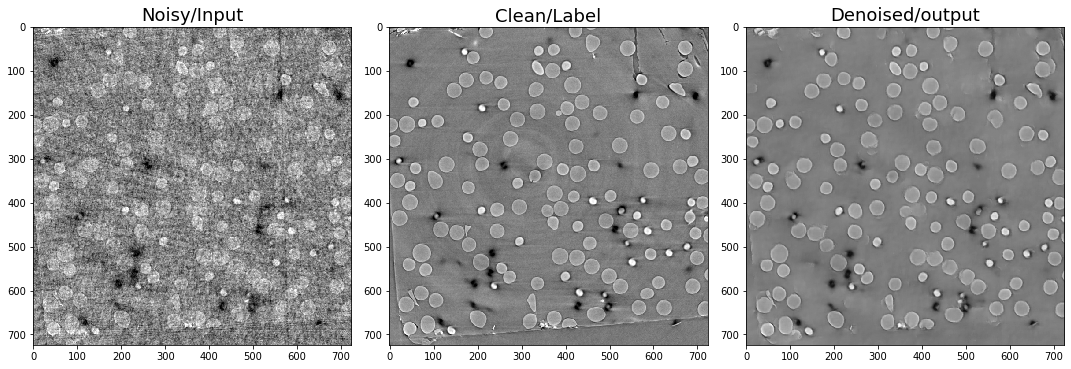

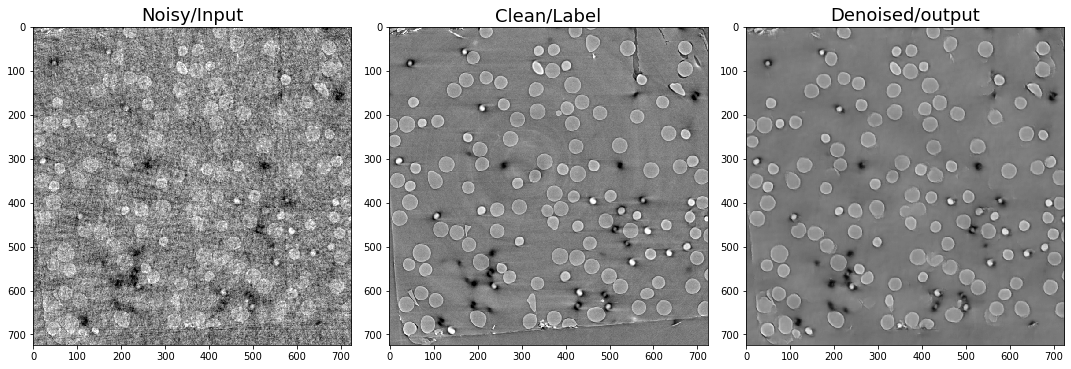

In [6]:
for _idx in range(ns_img_test_real.shape[0])[:2]:
    # just one line of code to denoise, need to remember that the input is four dimension [n, h, w, c] 
    dn_img = TomoGAN_mdl.predict(ns_img_test_real[_idx:_idx+1,:,:,np.newaxis]).squeeze()
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(ns_img_test_real[_idx, 200:-100, 200:-100], cmap='gray')
    plt.title('Noisy/Input', fontsize=18)
    plt.subplot(132)
    plt.imshow(gt_img_test_real[_idx, 200:-100, 200:-100], cmap='gray')
    plt.title('Clean/Label', fontsize=18)
    plt.subplot(133)
    plt.imshow(dn_img[200:-100, 200:-100], cmap='gray')
    plt.title('Denoised/output', fontsize=18)
    plt.tight_layout(); plt.show(); plt.close()

## you can also denoise in batch to accelerate the process

In [15]:
batch_sz = 4
_idx = 0
tick = time.time()
dn_img = TomoGAN_mdl.predict(ns_img_test_real[_idx:_idx+batch_sz,:,:,np.newaxis]).squeeze()
print('It takes %.1f seconds to denoise %d, %dx%d images,' % (time.time() - tick, batch_sz, \
                                                            ns_img_test_real.shape[1],\
                                                            ns_img_test_real.shape[2]))
dn_img.shape

It takes 5.5 seconds to denoise 8, 1024x1024 images,


(8, 1024, 1024)

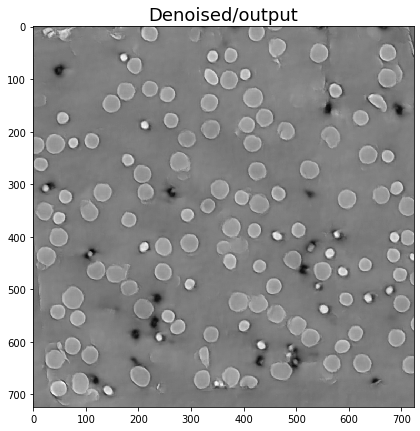

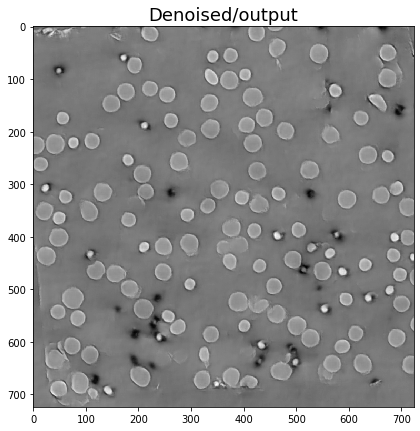

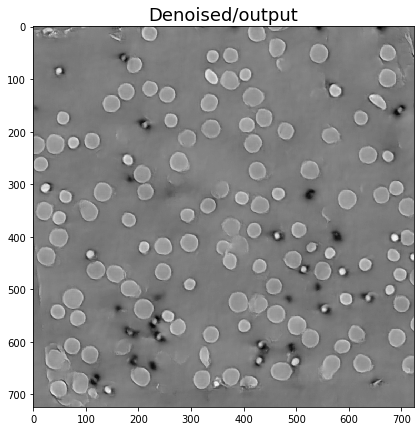

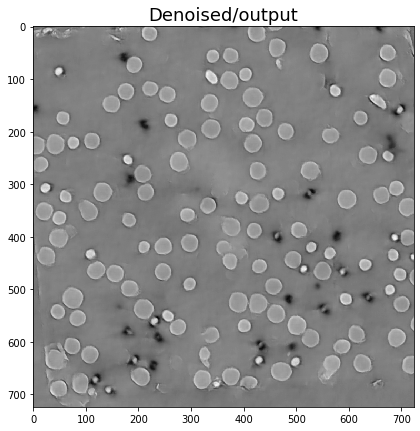

In [10]:
for _img_dn in dn_img:
    plt.figure(figsize=(7, 7))
    plt.imshow(_img_dn[200:-100, 200:-100], cmap='gray')
    plt.title('Denoised/output', fontsize=18)
    plt.show(); plt.close()